# PEAKS COMPARISON

In [1]:
from functions_py import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [3]:
data_set_name=['1x10','1x2','1x4','2x1','2x2']    

In [4]:
data_set_name=['1x10','1x2','1x4','2x1','2x2']
calibparam=['dataADU'+name+'.csv' for name in data_set_name]
calibparam

['dataADU1x10.csv',
 'dataADU1x2.csv',
 'dataADU1x4.csv',
 'dataADU2x1.csv',
 'dataADU2x2.csv']

In [5]:
npydata=['/home/zilvespedro/work/MICROCHIP/MANA/dataADU'+name+'.npy' for name in data_set_name]
npydata

['/home/zilvespedro/work/MICROCHIP/MANA/dataADU1x10.npy',
 '/home/zilvespedro/work/MICROCHIP/MANA/dataADU1x2.npy',
 '/home/zilvespedro/work/MICROCHIP/MANA/dataADU1x4.npy',
 '/home/zilvespedro/work/MICROCHIP/MANA/dataADU2x1.npy',
 '/home/zilvespedro/work/MICROCHIP/MANA/dataADU2x2.npy']

In [6]:
csv1x10=['AnaParamsCSV/AnaParams_1x10_1.csv',
             'AnaParamsCSV/AnaParams_1x10_2.csv',
             'AnaParamsCSV/AnaParams_1x10_3.csv']
csv1x2=['AnaParamsCSV/AnaParams_1x2_1.csv',
            'AnaParamsCSV/AnaParams_1x2_2.csv',
            'AnaParamsCSV/AnaParams_1x2_3.csv']
csv1x4=['AnaParamsCSV/AnaParams_1x4_1.csv',
            'AnaParamsCSV/AnaParams_1x4_2.csv']
csv2x1=['AnaParamsCSV/AnaParams_2x1_1.csv',
            'AnaParamsCSV/AnaParams_2x1_2.csv']
csv2x2=['AnaParamsCSV/AnaParams_2x2_1.csv',
            'AnaParamsCSV/AnaParams_2x2_2.csv']

data_set=[csv1x10,csv1x2,csv1x4,csv2x1,csv2x2]

In [7]:
exptimes=[]
for i in range(5):
    runs=[]
    for csv in data_set[i]:
        df = pd.read_csv(csv,usecols=['CHID','IMGID','ReadoutTime'])
        runs.append(pd.read_csv(csv,usecols=['CHID','IMGID','ReadoutTime']))
    csv_cg = pd.concat(runs)
    exptimes.append(csv_cg[csv_cg['CHID']==0]['ReadoutTime'].sum()/2)
exptimes

[4.7353067129629265,
 8.87774884259259,
 8.841168981481449,
 8.9538773148148,
 6.764525462962917]

In [12]:
Nimages=[]
for i in range(5):
    runs=[]
    for csv in data_set[i]:
        df = pd.read_csv(csv,usecols=['CHID','IMGID','ReadoutTime'])
        runs.append(pd.read_csv(csv,usecols=['CHID','IMGID','ReadoutTime']))
    csv_cg = pd.concat(runs)
    Nimages.append(len(csv_cg[csv_cg['CHID']==0]['ReadoutTime']))
Nimages

[1804, 678, 1345, 680, 1027]

In [8]:
datas=[]
for file in sorted(glob.glob('dataADU*.npy')):
    print(file)#,np.load(file).shape)
    datas.append(np.load(file))

dataADU1x10.npy
dataADU1x2.npy
dataADU1x4.npy
dataADU2x1.npy
dataADU2x2.npy


In [9]:
import ast
GBparams=[]
for k in range(5):
    globalpar=pd.read_csv(calibparam[k],usecols=['Params(a,b)'],converters={'Params(a,b)': ast.literal_eval})
    GBparams.append(list(globalpar['Params(a,b)']))

In [10]:
GBparams

[[(765.3495134194902, -21.03491579203542),
  (787.8105546011262, -5.101996781455337),
  (778.2267269784975, -17.05629488758783),
  (780.6617816047302, -15.280343859807278)],
 [(765.6743991706388, -24.46687778718444),
  (787.577173428341, -3.491112031624425),
  (777.8093756730882, -12.311903200837934),
  (780.5111585354839, -15.363252676304237)],
 [(765.3268032632392, -20.965124048489646),
  (787.4374981500698, -4.904539899505091),
  (777.6659336003437, -16.33538866172584),
  (780.2371466328551, -14.484699583991606)],
 [(765.3405065394022, -38.82474033395849),
  (787.0468196633079, -11.068707350186903),
  (776.5701150849039, -32.47583138168478),
  (780.4362555540214, -25.841930089252333)],
 [(764.8304816426052, -36.633745179382984),
  (786.8383866170557, -8.860370978211305),
  (776.6363365965535, -30.38757442454398),
  (780.067806162231, -24.10241677161411)]]

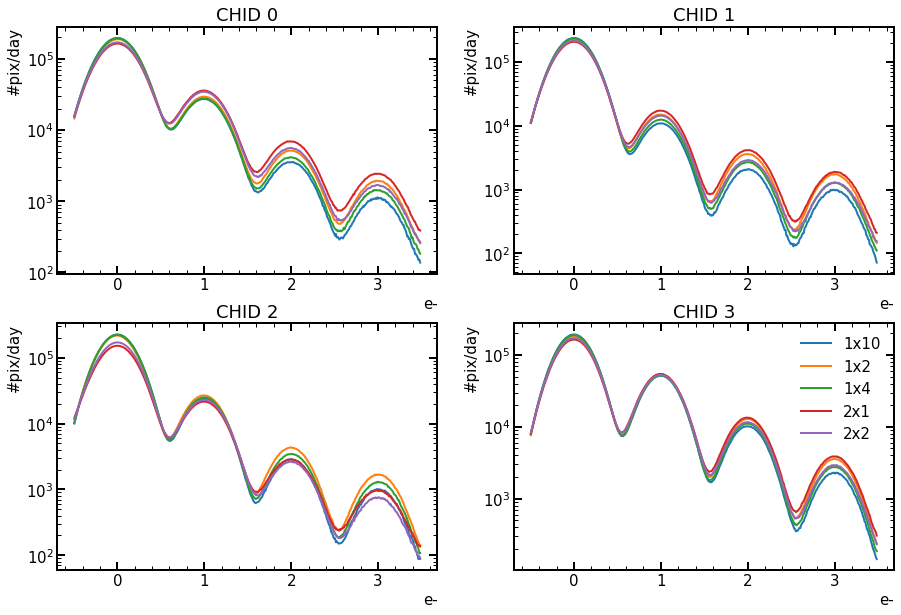

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
ax=[(0,0),(0,1),(1,0),(1,1)]
for k in range(5):
    for j in range(4):
        data = datas[k][j]
        data = (data-GBparams[k][j][1])/GBparams[k][j][0]
        global_hist, xb = np.histogram(data.flatten(), bins = np.arange(-0.5, 3.5, .01) ) 
        x = (xb[1:]+xb[:-1])/2
        axs[ax[j]].plot(x,global_hist/exptimes[k],linewidth=2,label=data_set_name[k])
        axs[ax[j]].set_yscale('log')
        axs[ax[j]].set_ylabel('#pix/day')
        axs[ax[j]].set_xlabel('e-')
        axs[ax[j]].set_title('CHID '+str(j))
axs[ax[j]].legend()

plt.savefig('/home/zilvespedro/work/MICROCHIP/MANA/PEAKS.png', bbox_inches='tight', dpi=100)

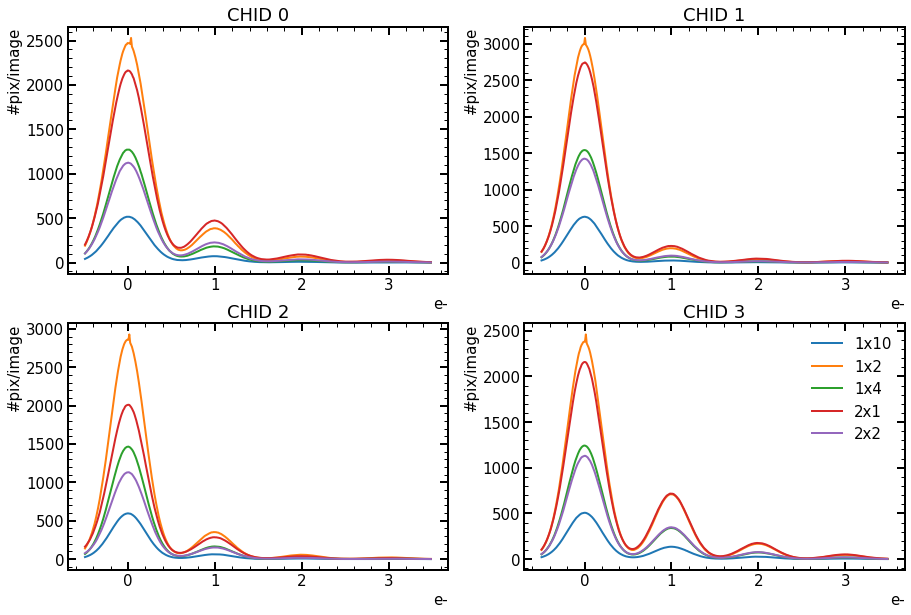

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
ax=[(0,0),(0,1),(1,0),(1,1)]
for k in range(5):
    for j in range(4):
        data = datas[k][j]
        data = (data-GBparams[k][j][1])/GBparams[k][j][0]
        global_hist, xb = np.histogram(data.flatten(), bins = np.arange(-0.5, 3.5, .01) ) 
        x = (xb[1:]+xb[:-1])/2
        axs[ax[j]].plot(x,global_hist/Nimages[k],linewidth=2,label=data_set_name[k])
#         axs[ax[j]].set_yscale('log')
        axs[ax[j]].set_ylabel('#pix/image')
        axs[ax[j]].set_xlabel('e-')
        axs[ax[j]].set_title('CHID '+str(j))
axs[ax[j]].legend()

plt.savefig('/home/zilvespedro/work/MICROCHIP/MANA/PEAKSbyimagelinear.png', bbox_inches='tight', dpi=100)

In [20]:
path_to_img='/share/storage2/connie/data/microchip/'
for p in ["proc_bkgd_1x2_3", "proc_bkgd_1x4_2", "proc_bkgd_2x1_1", "proc_bkgd_2x1_2", "proc_bkgd_2x2_1"]:
    
    binned = p.replace('proc_bkgd', '')
    print(binned[1:-2])
#     catalog_name = "Catalog"+binned+".csv"

1x2
1x4
2x1
2x1
2x2


In [40]:
import ast
GBparamsDic={}
data_set_name=['1x10','1x2','1x4','2x1','2x2']
calibparam=['/home/zilvespedro/work/MICROCHIP/MANA/dataADU'+name+'.csv' for name in data_set_name]
for k in range(5):
    globalpar=pd.read_csv(calibparam[k],usecols=['Params(a,b)'],converters={'Params(a,b)': ast.literal_eval})
    GBparamsDic[data_set_name[k]]=(list(globalpar['Params(a,b)']))

In [45]:
for p in sorted(os.listdir('/share/storage2/connie/data/microchip/')):
    if p[:4]=='proc':
        print(p)
        binned=re.findall( "proc_bkgd_([0-9x]+)_", p )[0]
        print(GBparamsDic[binned])

proc_bkgd_1x10_1
[(765.3495134194902, -21.03491579203542), (787.8105546011262, -5.101996781455337), (778.2267269784975, -17.05629488758783), (780.6617816047302, -15.280343859807278)]
proc_bkgd_1x10_2
[(765.3495134194902, -21.03491579203542), (787.8105546011262, -5.101996781455337), (778.2267269784975, -17.05629488758783), (780.6617816047302, -15.280343859807278)]
proc_bkgd_1x10_3
[(765.3495134194902, -21.03491579203542), (787.8105546011262, -5.101996781455337), (778.2267269784975, -17.05629488758783), (780.6617816047302, -15.280343859807278)]
proc_bkgd_1x2_1
[(765.6743991706388, -24.46687778718444), (787.577173428341, -3.491112031624425), (777.8093756730882, -12.311903200837934), (780.5111585354839, -15.363252676304237)]
proc_bkgd_1x2_2
[(765.6743991706388, -24.46687778718444), (787.577173428341, -3.491112031624425), (777.8093756730882, -12.311903200837934), (780.5111585354839, -15.363252676304237)]
proc_bkgd_1x2_3
[(765.6743991706388, -24.46687778718444), (787.577173428341, -3.4911120

In [41]:
GBparamsDic

{'1x10': [(765.3495134194902, -21.03491579203542),
  (787.8105546011262, -5.101996781455337),
  (778.2267269784975, -17.05629488758783),
  (780.6617816047302, -15.280343859807278)],
 '1x2': [(765.6743991706388, -24.46687778718444),
  (787.577173428341, -3.491112031624425),
  (777.8093756730882, -12.311903200837934),
  (780.5111585354839, -15.363252676304237)],
 '1x4': [(765.3268032632392, -20.965124048489646),
  (787.4374981500698, -4.904539899505091),
  (777.6659336003437, -16.33538866172584),
  (780.2371466328551, -14.484699583991606)],
 '2x1': [(764.9499715167705, -59.36088962524825),
  (786.8929745471323, -23.453094641159243),
  (776.559001421101, -45.716226210708264),
  (779.9487249722295, -52.062355417276386)],
 '2x2': [(765.7273462318045, -24.472783272370652),
  (787.5807998782147, -3.4096185412038835),
  (777.7899235055999, -11.961100138980907),
  (780.4788079875377, -15.23899174396378)]}